In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime, timedelta
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams["axes.unicode_minus"] = False

In [33]:
DATA_ROOT = '~/projects/factormaster'
START_DATE = pd.to_datetime('2014-02-01')
END_DATE = pd.to_datetime('2020-11-30')

In [30]:
def _parse_factor_path(model_name, prefix):
    special_map = {'Carhart4': 'c4'}
    suffix = special_map.get(model_name, model_name)
    factor_path = os.path.join(DATA_ROOT, f'data/payoffs/pricing_factors/{model_name}/{prefix.lower()}_{suffix.lower()}.csv')
    return factor_path

def _load_model(factor_path, start_date, end_date):
    df = pd.read_csv(factor_path, index_col=0, parse_dates=True)
    df = df.loc[start_date: end_date]
    return df

def display_factors(model_name, prefix, start_date, end_date):
    factor_path = _parse_factor_path(model_name, prefix)
    df = _load_model(factor_path, start_date, end_date)
    # plot daily rtn
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(20 , 5 * len(df.columns)))
    fig.suptitle(f'Daily Return of {prefix.lower()} {model_name}', fontsize=18)
    for i in range(len(df.columns)):
        factor = df.columns[i]
        df[[factor]].plot(ax=axes[i])
    plt.show()
    # plot cumulative payoffs
    fig, axes = plt.subplots(len(df.columns), 1, figsize=(20 , 5 * len(df.columns)))
    fig.suptitle(f'Cumulative Payoffs of {prefix.lower()} {model_name}', fontsize=18)
    for i in range(len(df.columns)):
        factor = df.columns[i]
        (df[[factor]] + 1).cumprod().plot(ax=axes[i])
    plt.show()

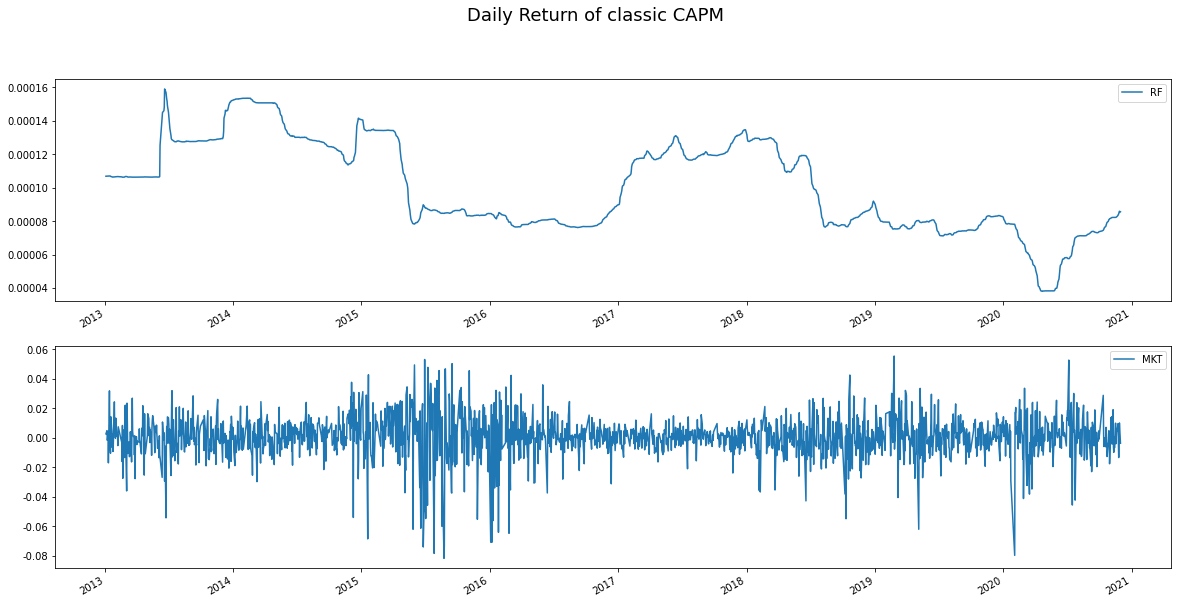

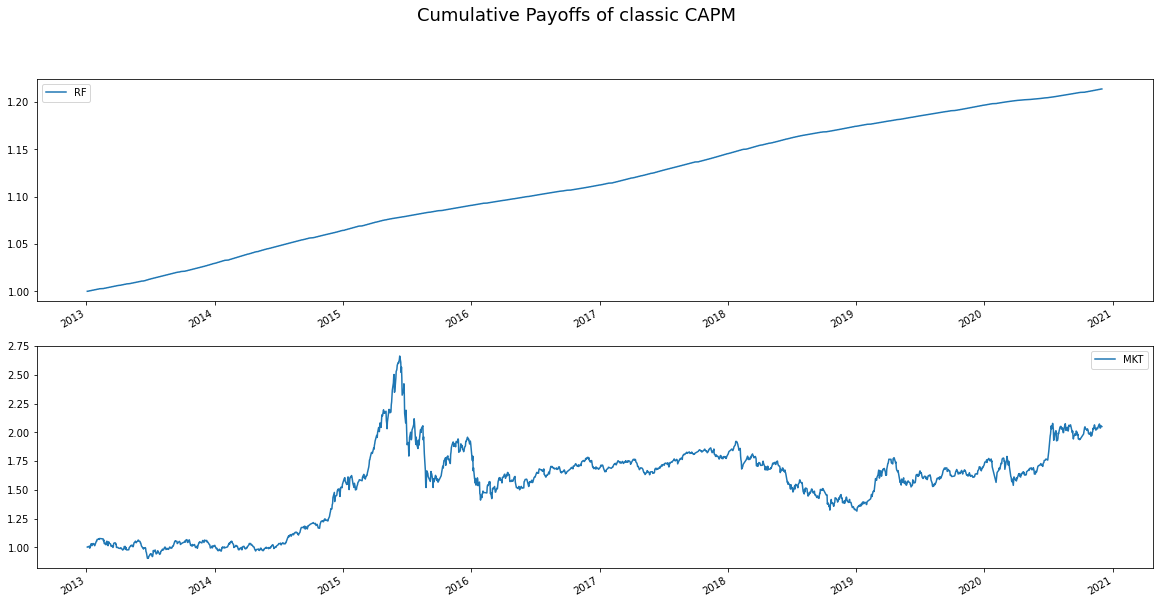

In [31]:
display_factors('CAPM', 'classic', START_DATE, END_DATE)

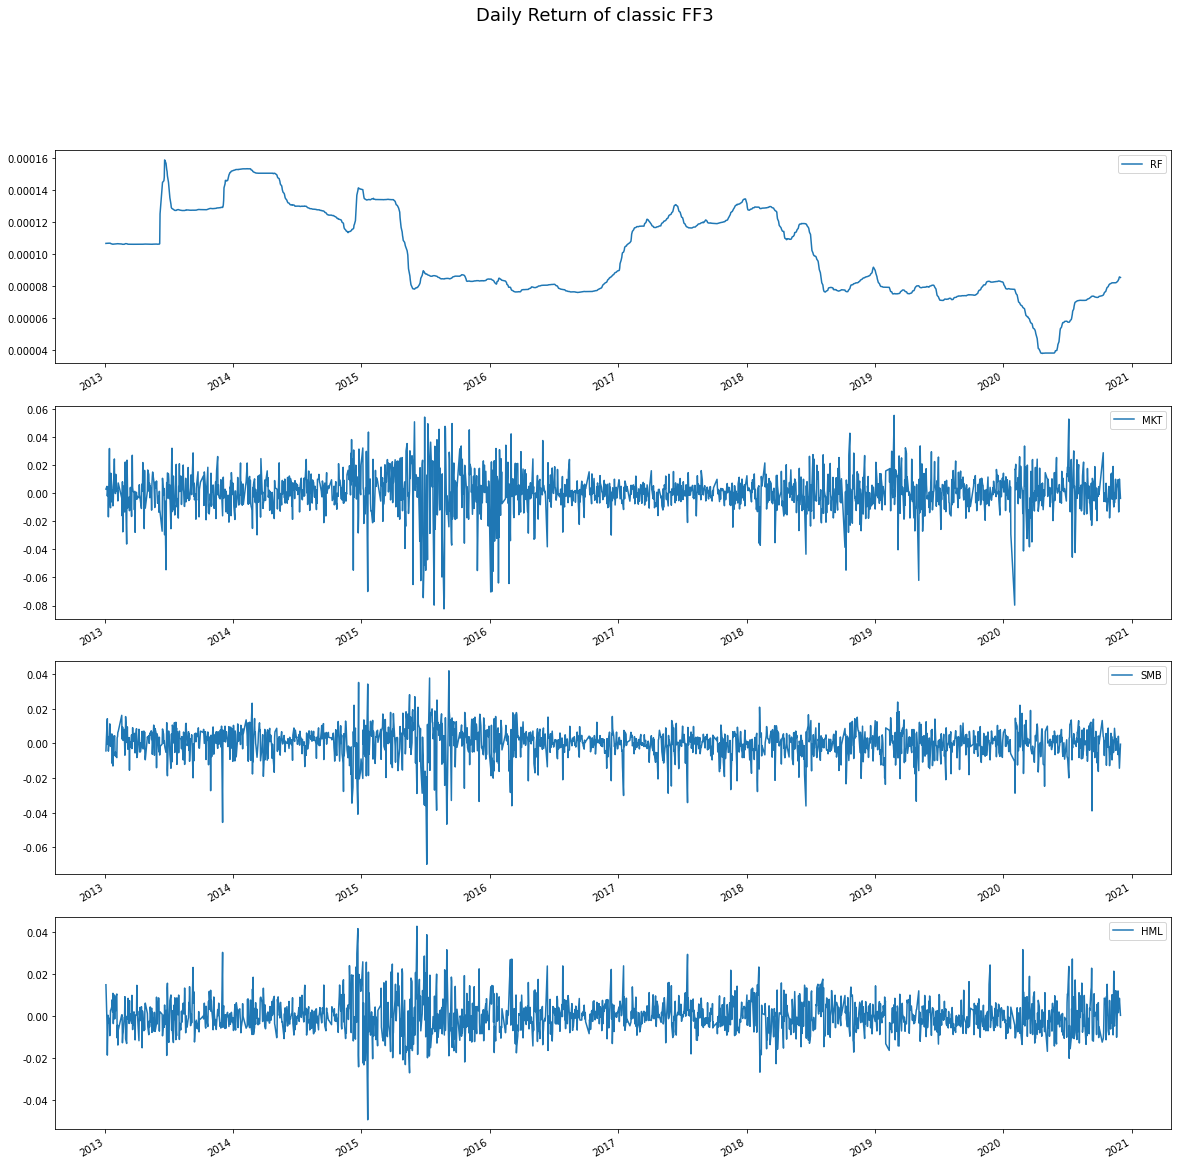

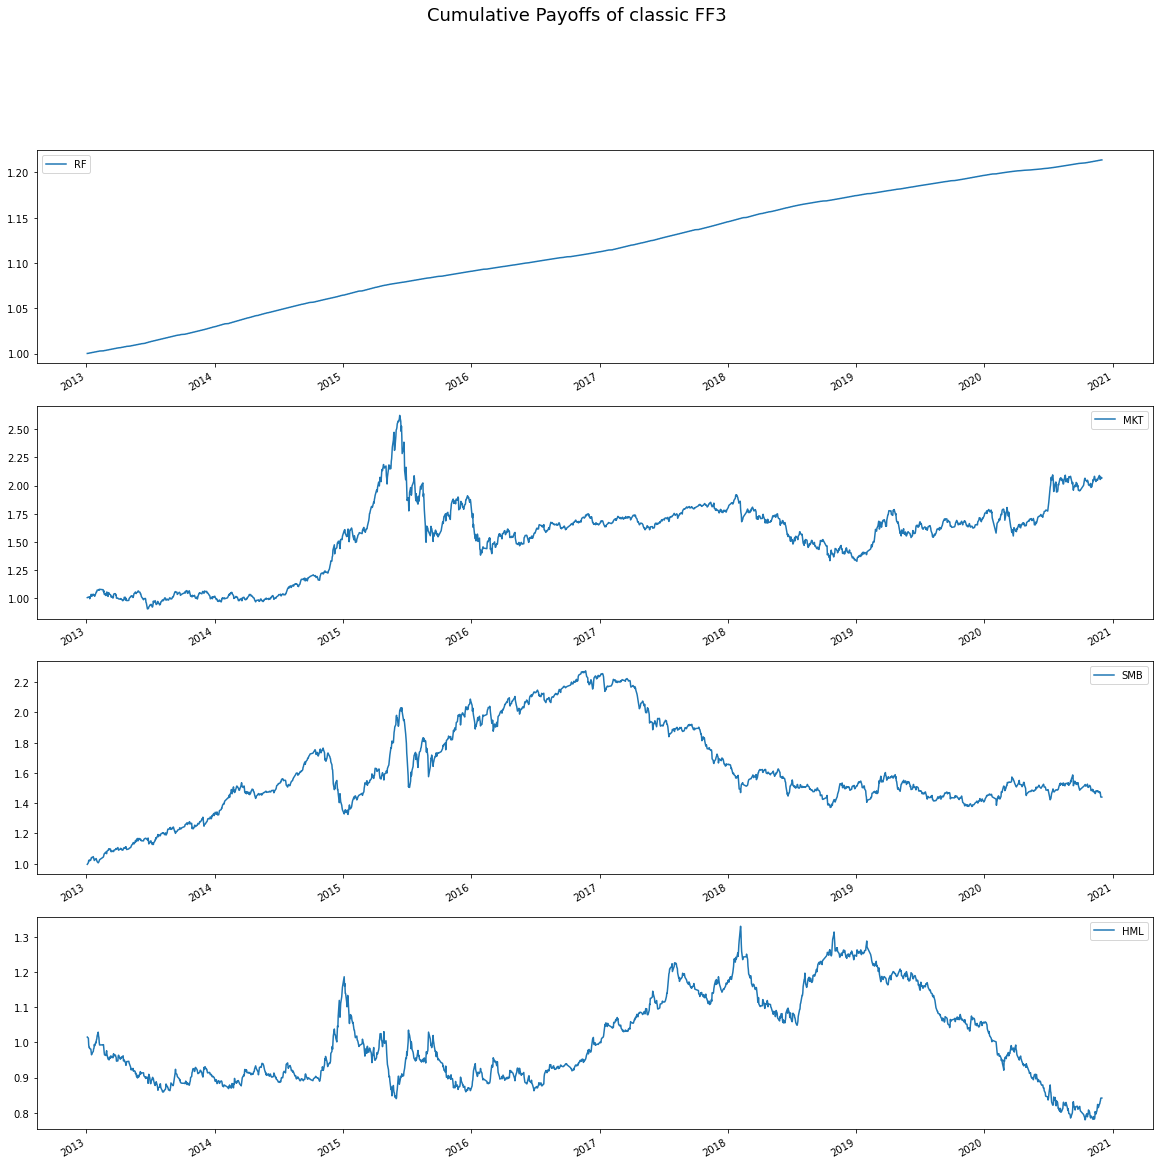

In [24]:
display_factors('FF3', 'classic',START_DATE, END_DATE)

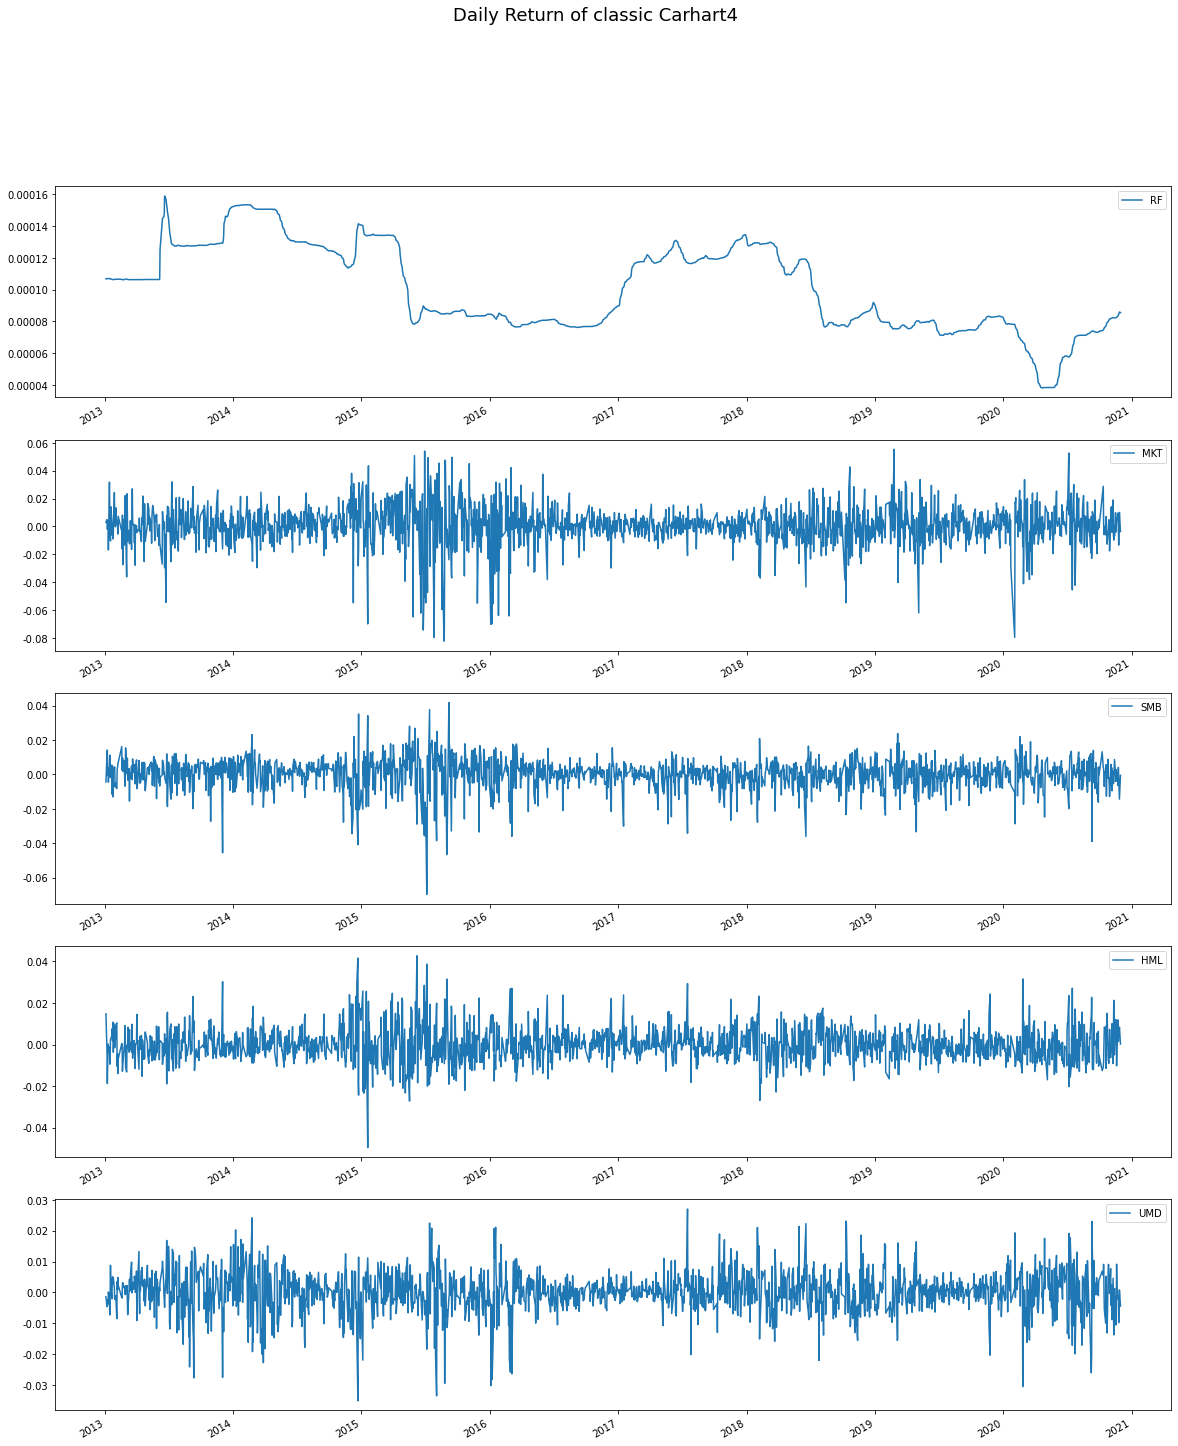

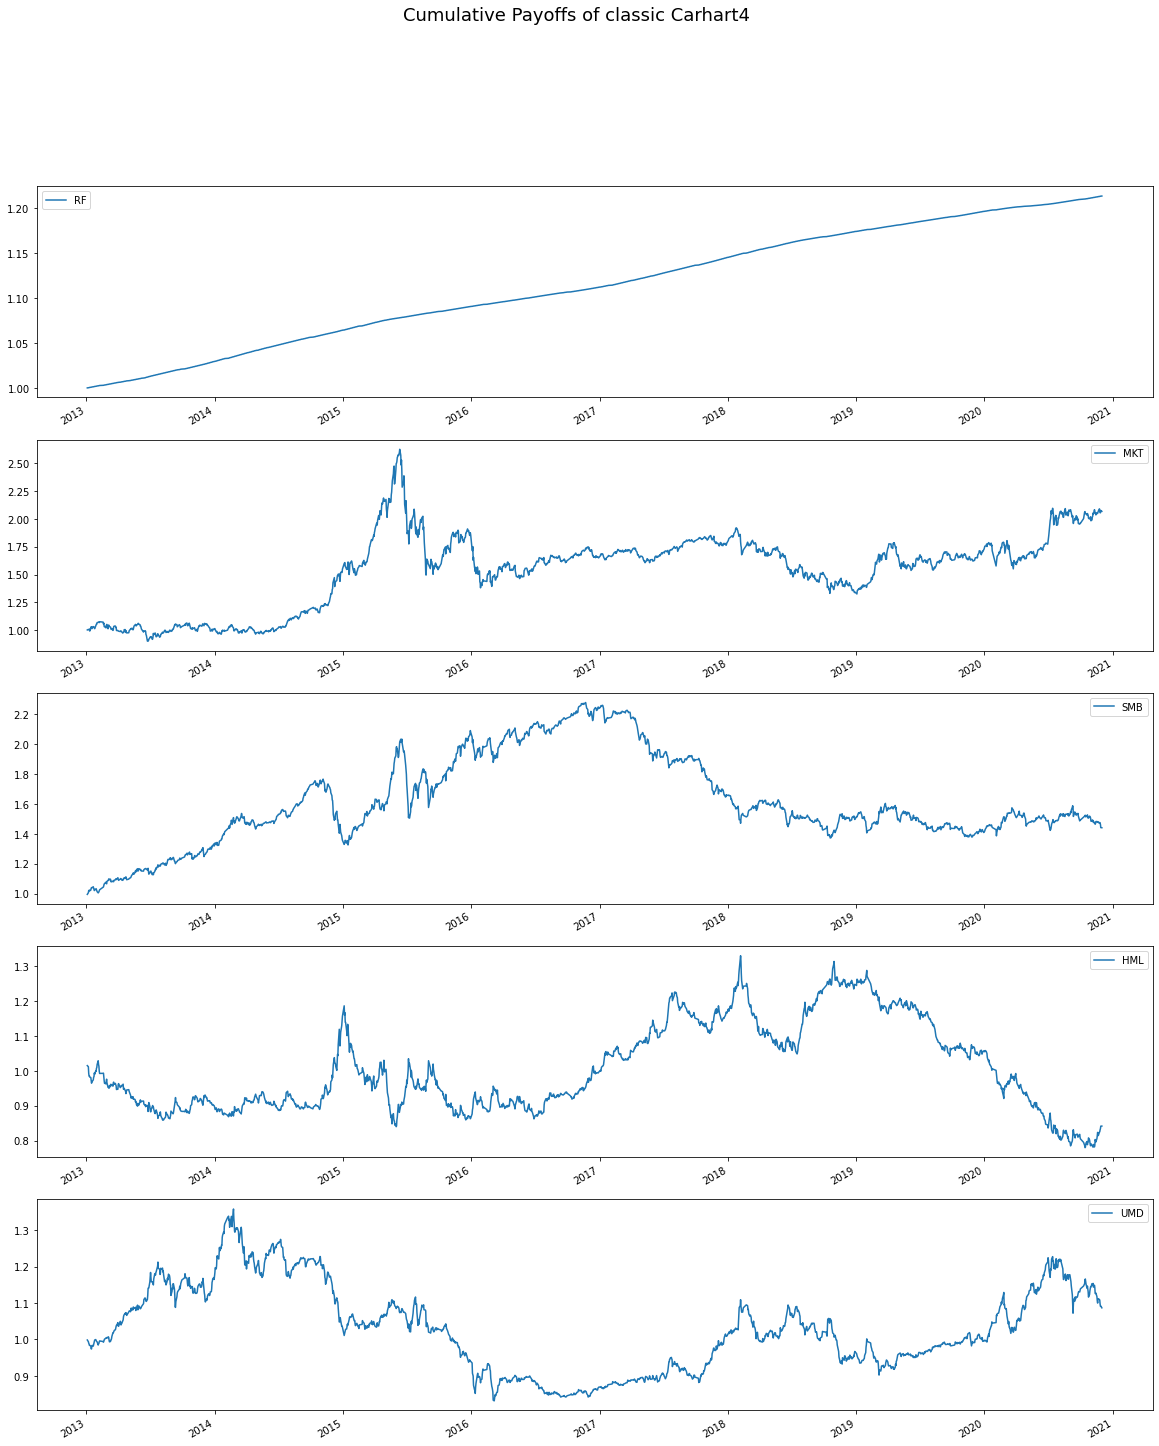

In [28]:
display_factors('Carhart4', 'classic',START_DATE, END_DATE)

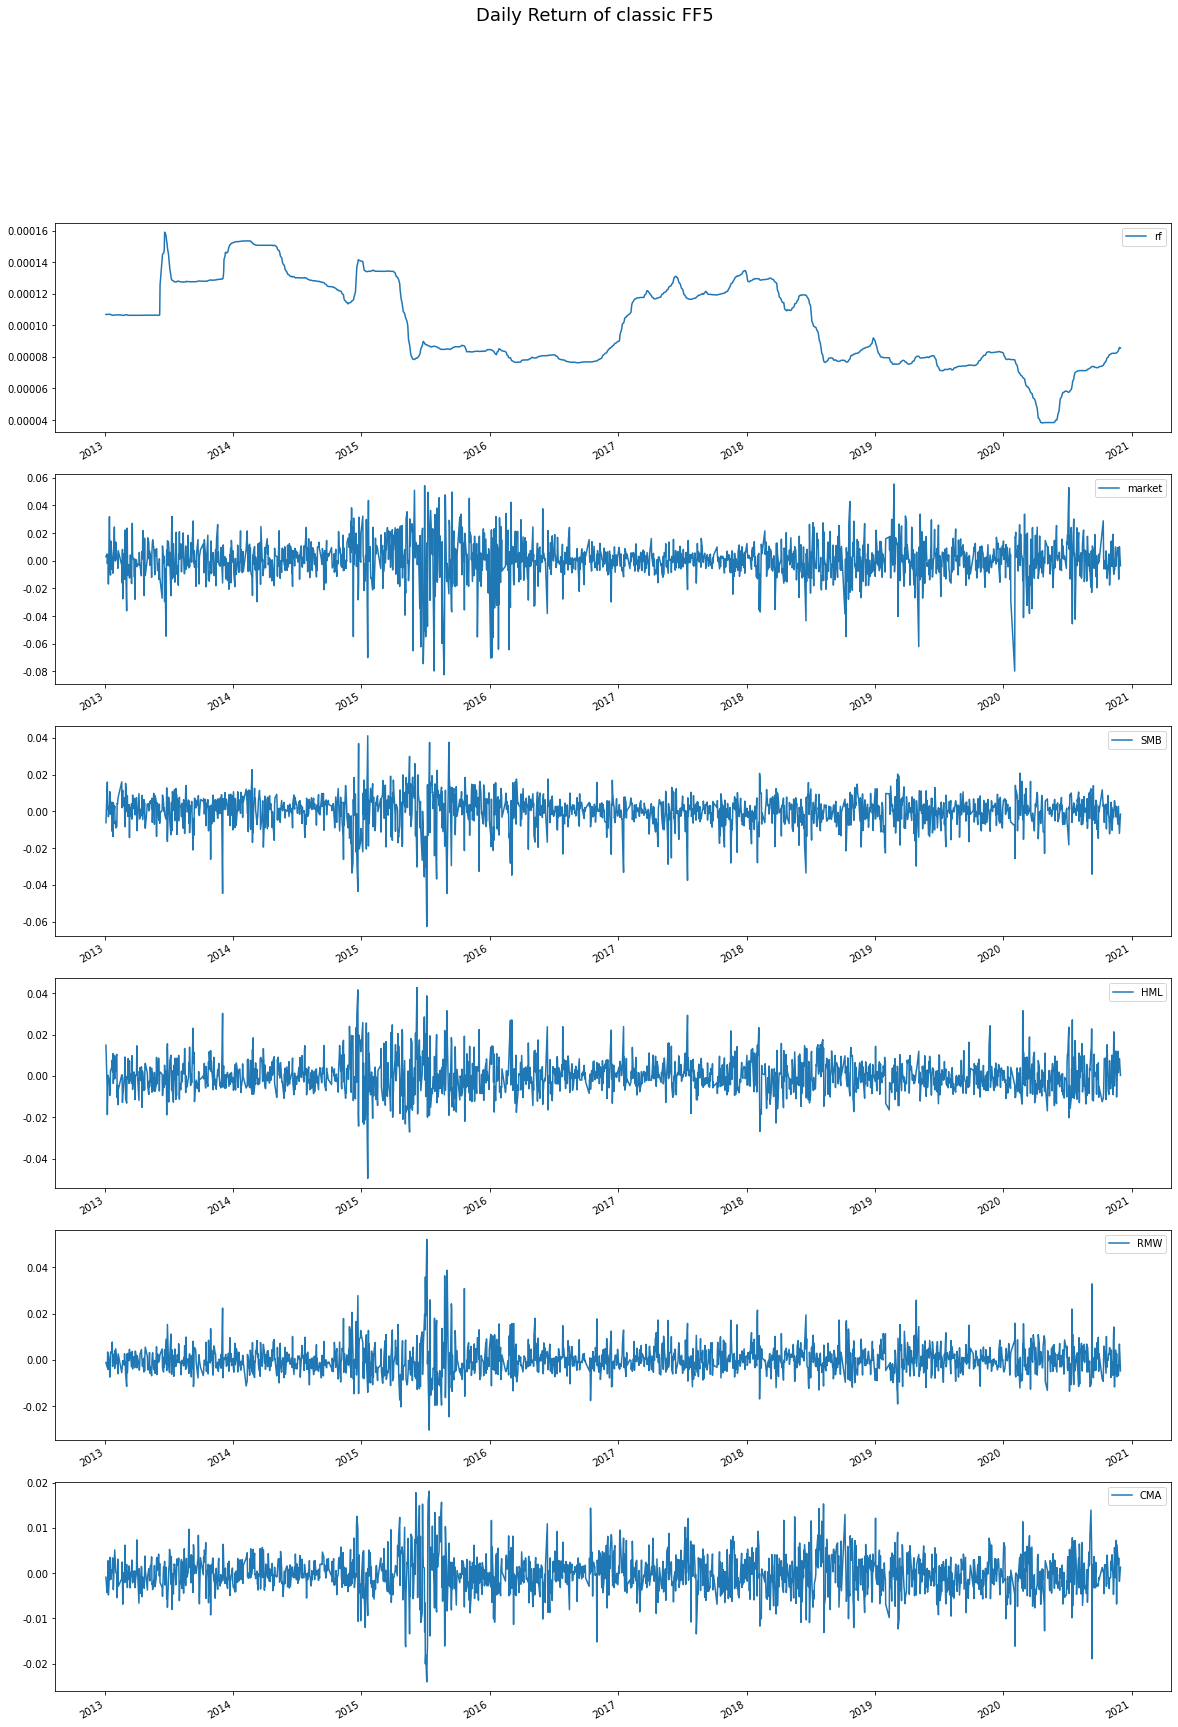

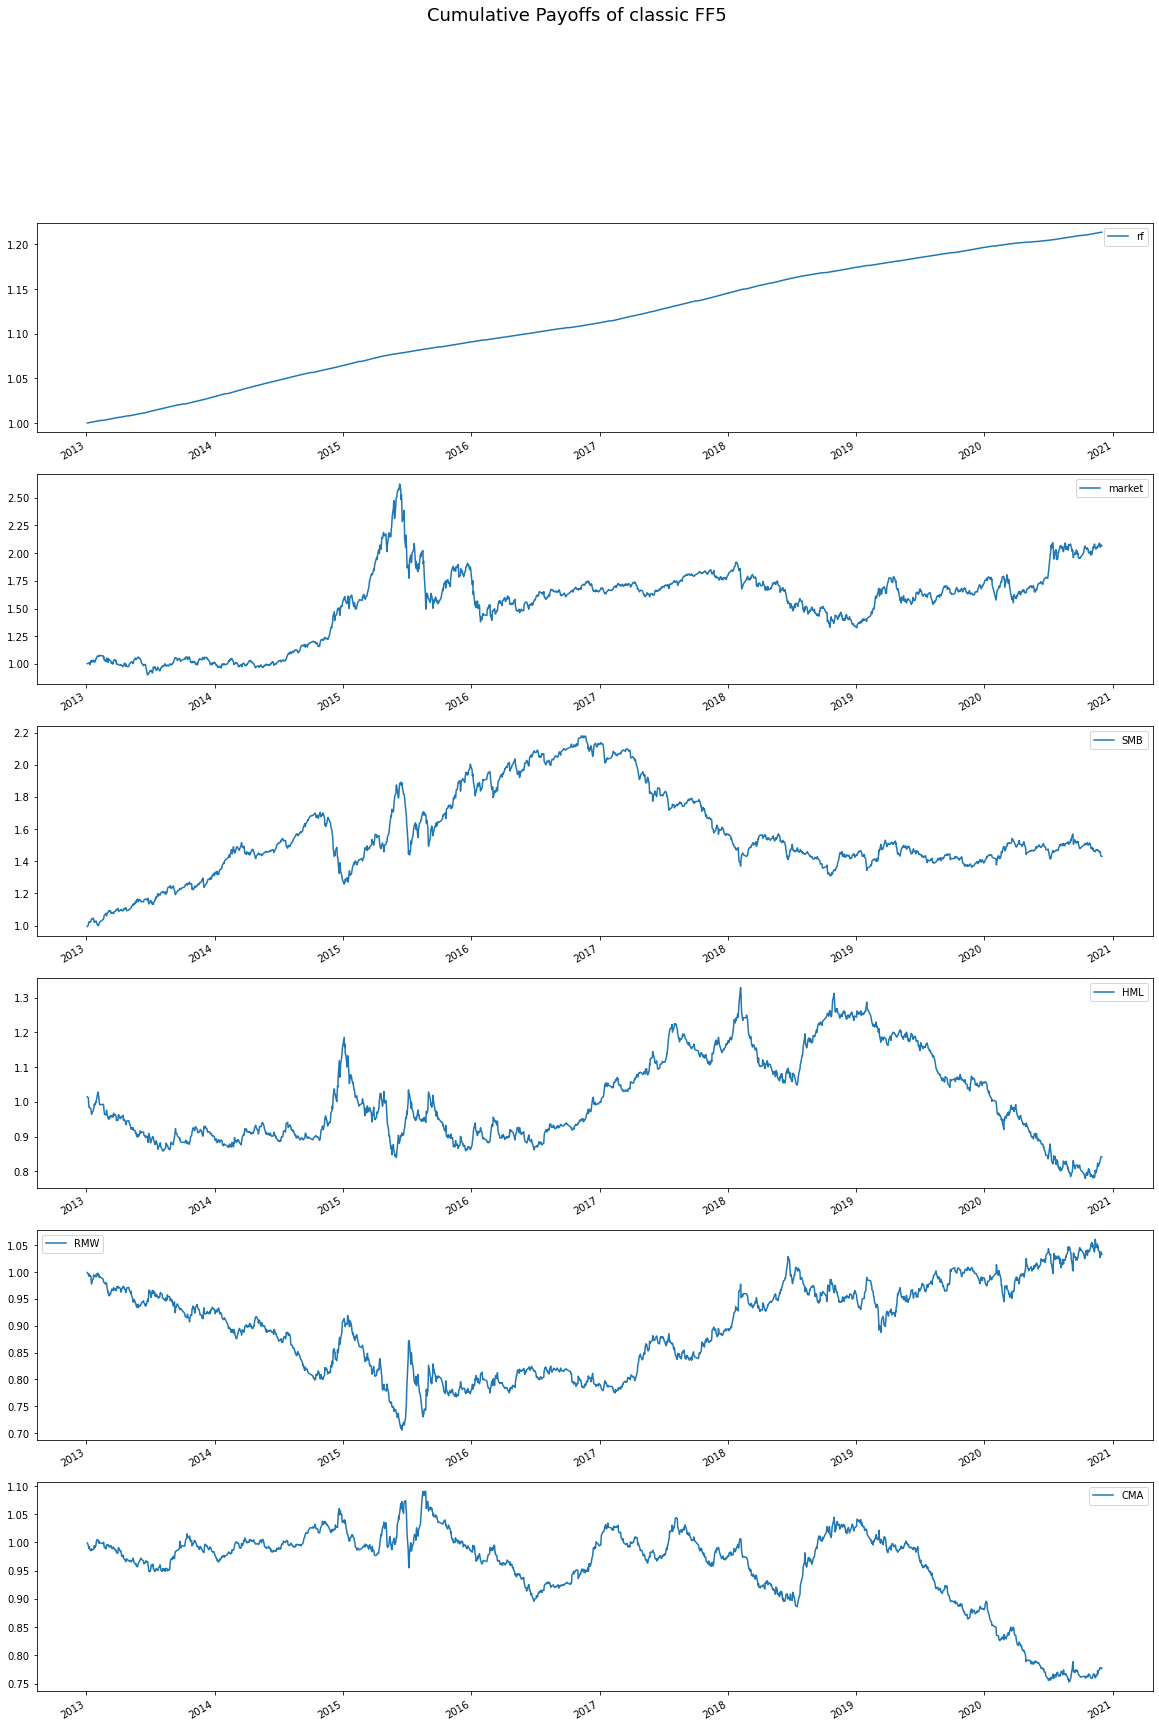

In [29]:
display_factors('FF5', 'classic',START_DATE, END_DATE)

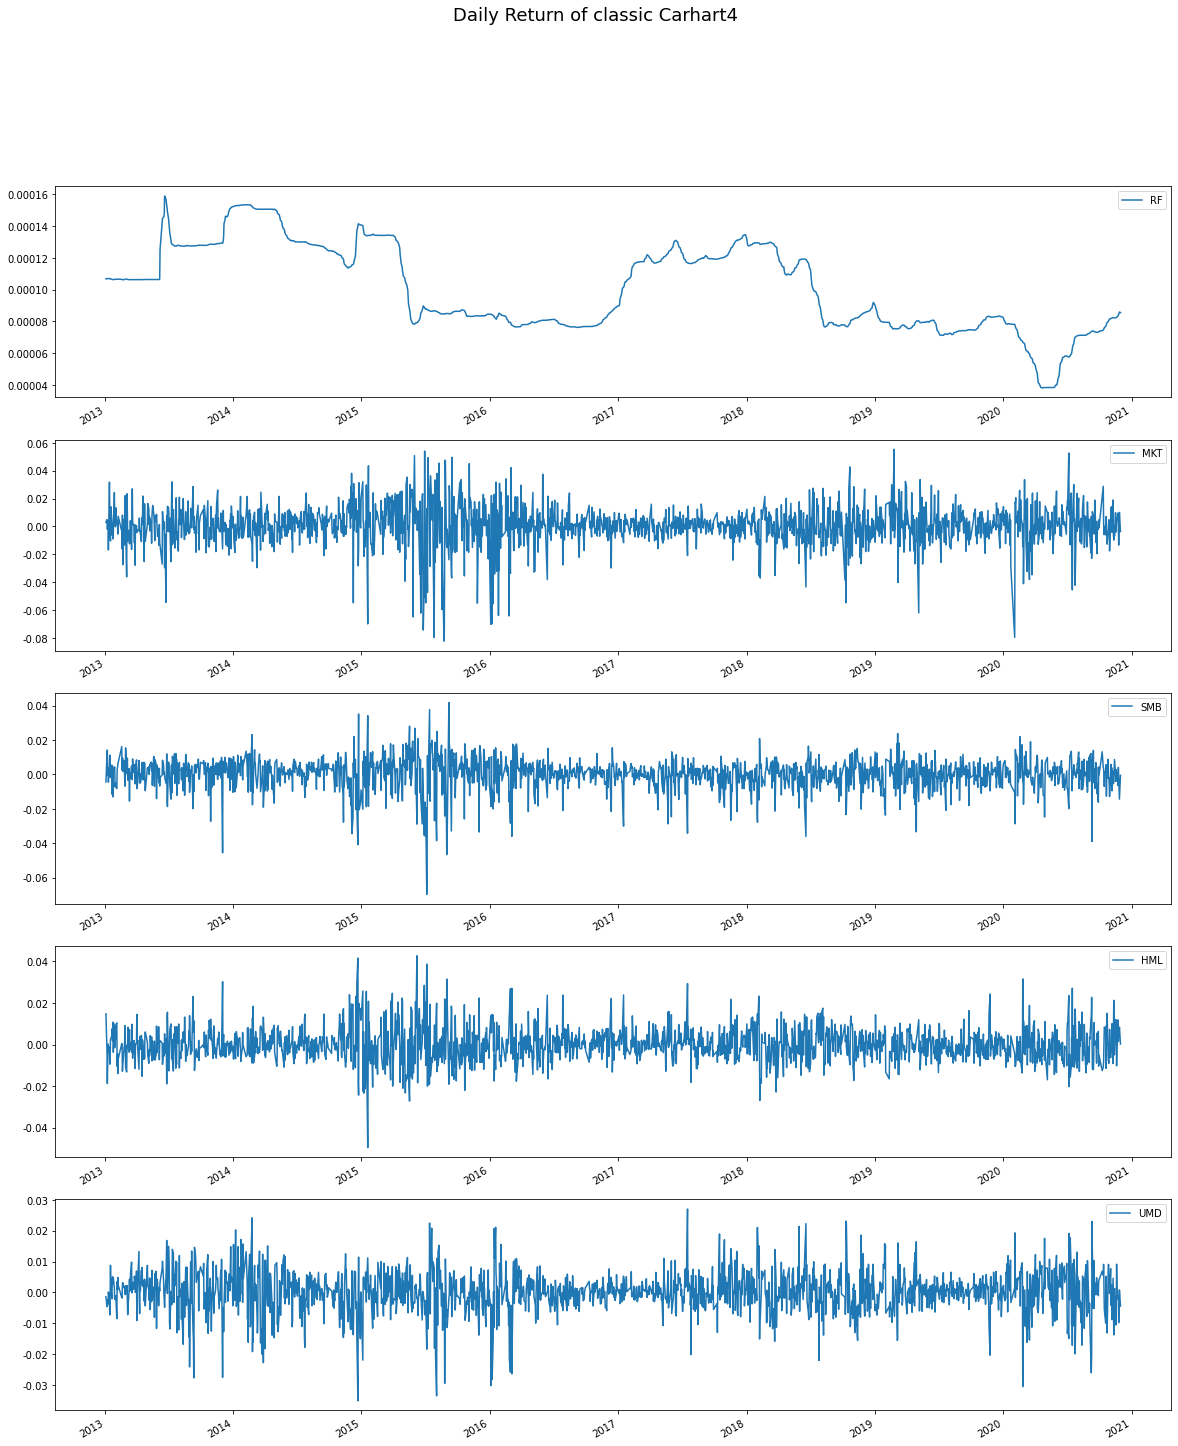

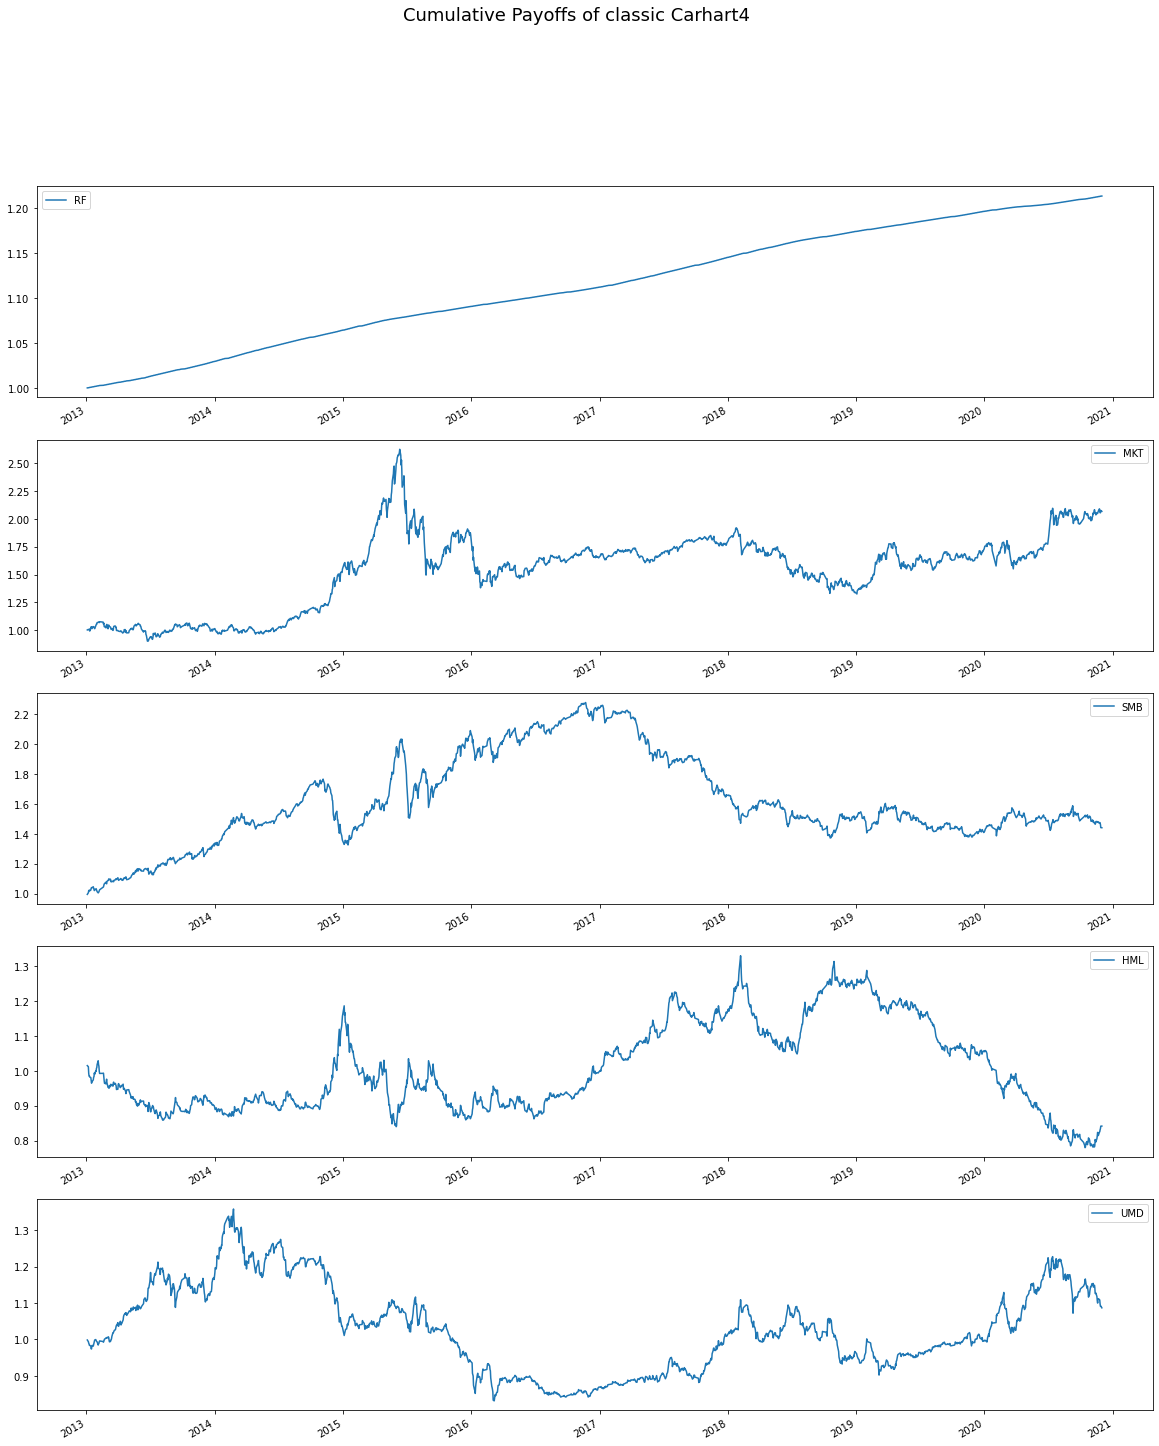

In [32]:
display_factors('Carhart4', 'classic', START_DATE, END_DATE)

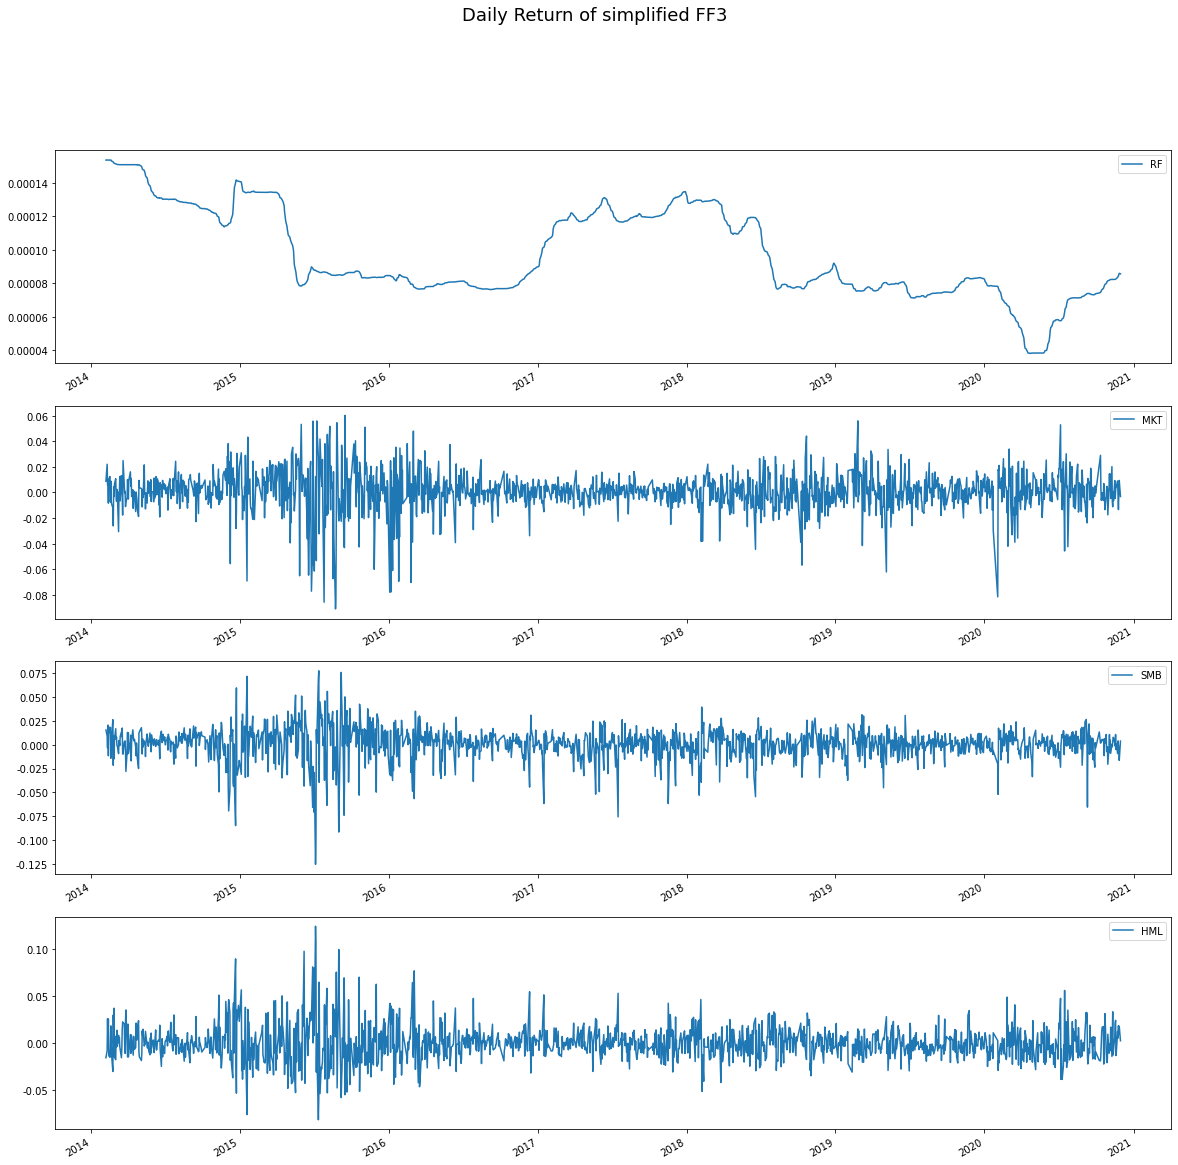

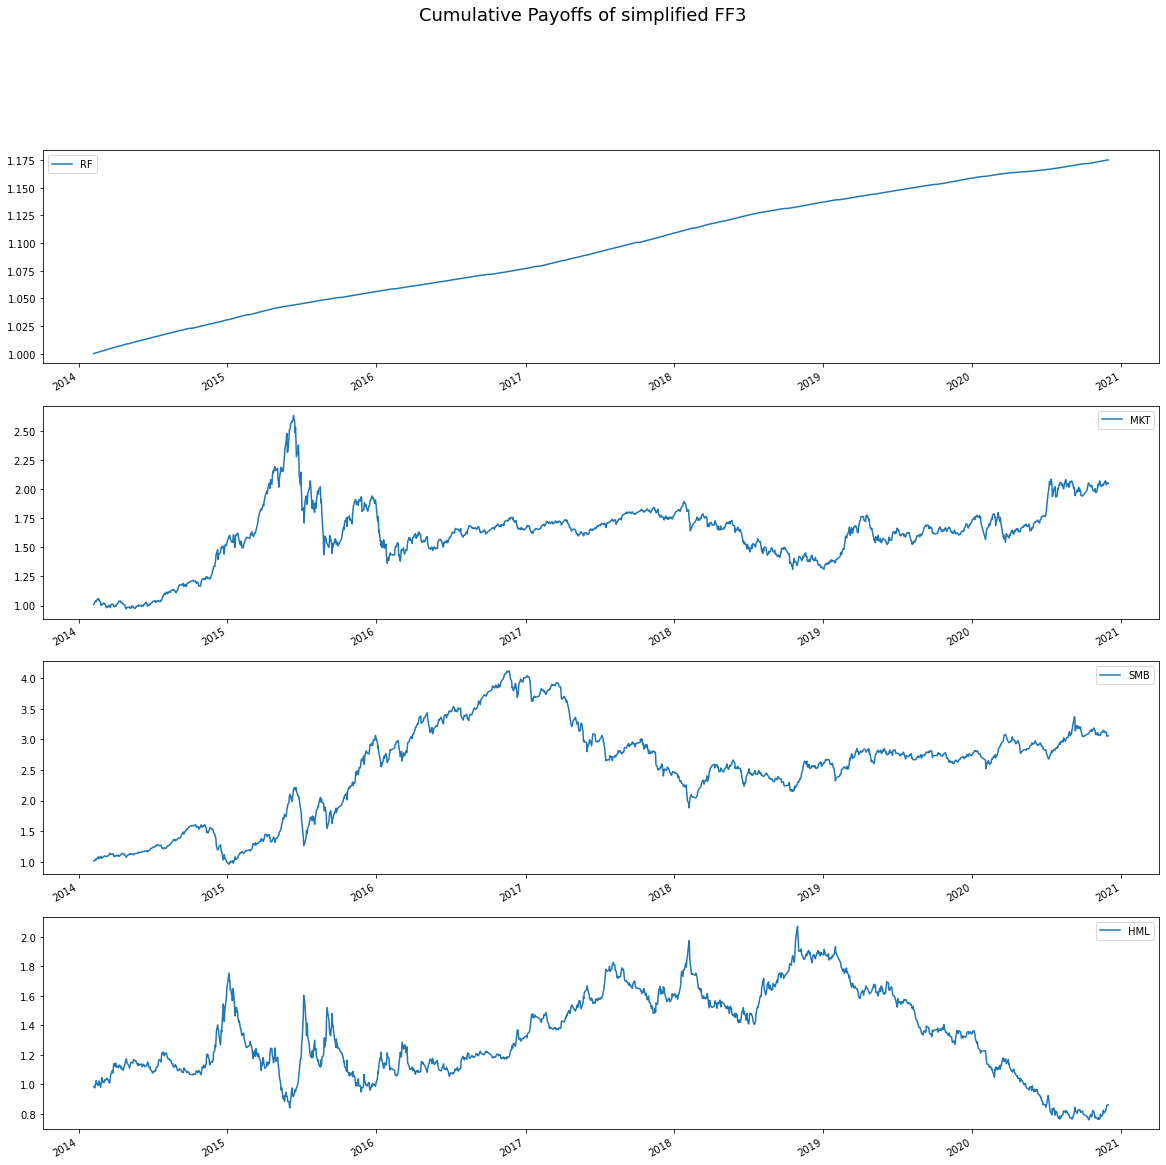

In [34]:
display_factors('FF3', 'simplified',START_DATE, END_DATE)